In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg


from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_excel('machine_space.xlsx')
df.head()

,LogDate,CURRENTPERM
0,2023-08-03,180.573811
1,2023-03-27,176.566286
2,2023-07-06,175.938131
3,2023-05-25,188.879152
4,2024-03-03,285.718724


In [10]:
df2 = df[(df['LogDate'] >  '2023-07-01') & (df['LogDate'] < '2024-01-01')]

# Moving Average Methodology

This method is slick with random short-term variations. Relatively associated with the components of time series.

The Moving Average (MA) (or) Rolling Mean: The value of MA is calculated by taking average data of the time-series within k periods.
- Simple Moving Average (SMA),
- Cumulative Moving Average (CMA)
- Exponential Moving Average (EMA)

## Simple Moving Average (SMA)
The Simple Moving Average (SMA) calculates the unweighted mean of the previous M or N points.

In [11]:
df2.columns

Index(['LogDate', 'CURRENTPERM'], dtype='object')

In [12]:
df2.set_index('LogDate' , inplace=True)

In [13]:
df2.sort_index(inplace=True)
df2.head()

,CURRENTPERM
LogDate,
2023-07-02,181.766317
2023-07-03,174.514185
2023-07-04,175.051491
2023-07-05,175.626757
2023-07-06,175.938131


Text(0, 0.5, 'Space')

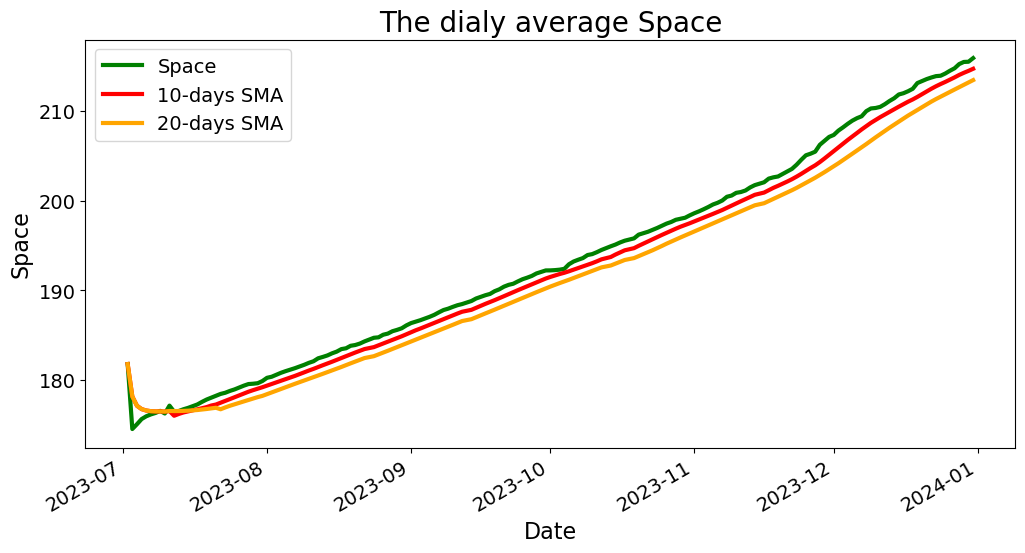

In [14]:
df2['SMA_10'] = df2.CURRENTPERM.rolling(10, min_periods=1).mean()
df2['SMA_20'] = df2.CURRENTPERM.rolling(20, min_periods=1).mean()

# Grean = CURRENTPERM , RED = 10 yrs, ORANG colors for the line plot
colors = ['green', 'red', 'orange']
# Line plot 
df2.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Space', '10-days SMA', '20-days SMA'], fontsize=14)
plt.title('The dialy average Space', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Space', fontsize=16)

## Cumulative Moving Average (CMA)
The CMA is the unweighted mean of past values till the current time.

Text(0, 0.5, 'Space')

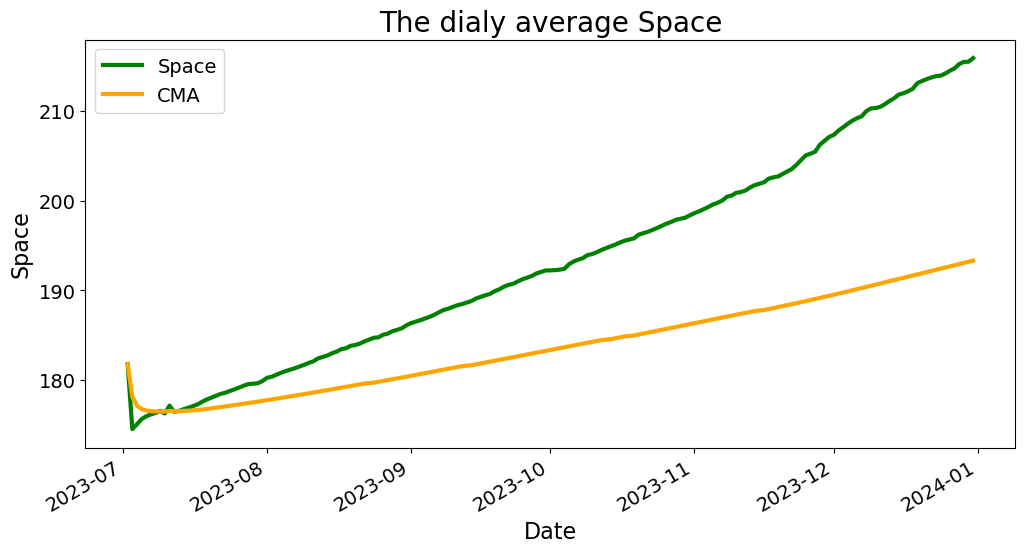

In [15]:
df2['CMA'] = df2.CURRENTPERM.expanding().mean()

# green  space and Orange -CMA
colors = ['green', 'orange']
# line plot
df2[['CURRENTPERM', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Space', 'CMA'], fontsize=14)
plt.title('The dialy average Space', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Space', fontsize=16)

## Exponential Moving Average (EMA)
EMA is mainly used to identify trends and filter out noise. The weight of elements is decreased gradually over time. This means It gives weight to recent data points, not historical ones. Compared with SMA, the EMA is faster to change and more sensitive.

Text(0, 0.5, 'Space')

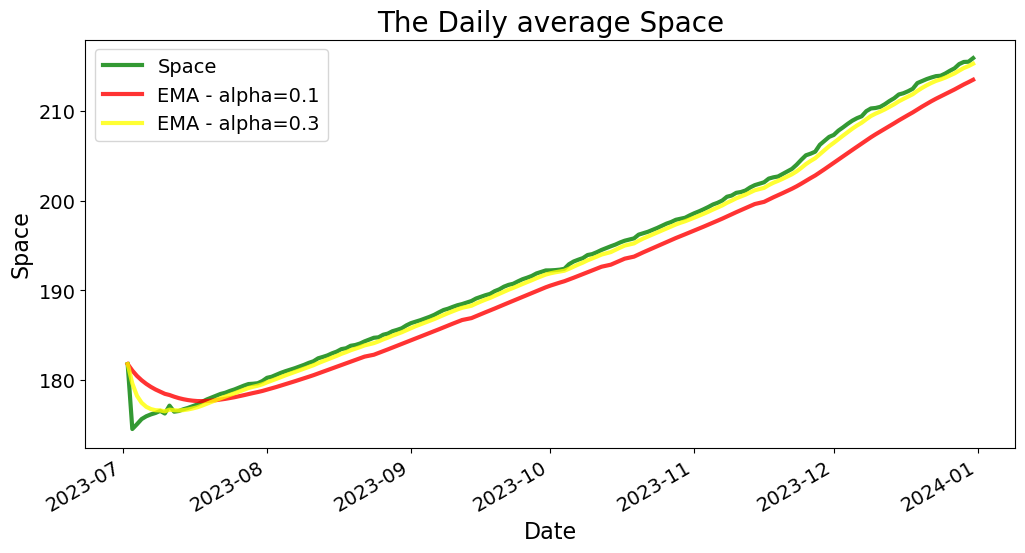

In [16]:
df2['EMA_0.1'] = df2.CURRENTPERM.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df2['EMA_0.3'] = df2.CURRENTPERM.ewm(alpha=0.3, adjust=False).mean()

# green space , red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
df2[['CURRENTPERM', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Space', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The Daily average Space', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Space', fontsize=16)

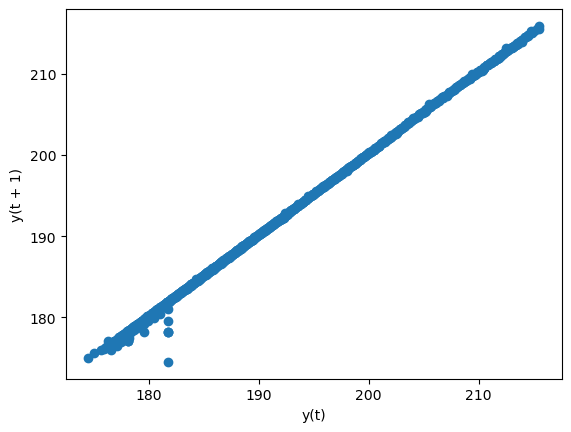

In [18]:
lag_plot(df2)
plt.show()

# Auto-Regressive Model

In [19]:
X = df2.CURRENTPERM.values
train, test = X[1:len(X)-60], X[len(X)-60:]

In [20]:
model = AutoReg(train, lags=20)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [-0.34129757  0.97943869 -0.0639752  -0.11981565  0.18352255 -0.10870468
  0.09161967  0.04581317  0.06247824 -0.21864655 -0.01422234  0.14165619
 -0.08656672  0.10620789 -0.06325688 -0.01450901  0.06537897  0.04477038
 -0.0276077  -0.0872474   0.08781721]


In [21]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions

array([198.63069156, 198.88567136, 199.09294546, 199.31267118,
       199.54746719, 199.78256539, 200.01195444, 200.26523849,
       200.51349365, 200.75341338, 200.98111702, 201.20909183,
       201.45046353, 201.68662046, 201.91551434, 202.13876636,
       202.37977719, 202.62076917, 202.84922843, 203.07517196,
       203.30834265, 203.54522441, 203.77927697, 204.0147314 ,
       204.25541209, 204.49684821, 204.73191982, 204.96850877,
       205.20870469, 205.45251558, 205.69516692, 205.93591038,
       206.17760138, 206.4209966 , 206.66434694, 206.90638774,
       207.14956503, 207.39460997, 207.63985586, 207.88368102,
       208.12834184, 208.37463122, 208.62118808, 208.86700271,
       209.11349805, 209.36171127, 209.61038627, 209.85887516,
       210.10762624, 210.35741157, 210.60782919, 210.8584879 ,
       211.10952782, 211.36141975, 211.61394367, 211.86665599,
       212.11959728, 212.37321262, 212.62762267, 212.88236861])

In [22]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    print('-'*50)

predicted=198.630692, expected=198.609108
--------------------------------------------------
predicted=198.885671, expected=198.818368
--------------------------------------------------
predicted=199.092945, expected=199.052312
--------------------------------------------------
predicted=199.312671, expected=199.304089
--------------------------------------------------
predicted=199.547467, expected=199.582710
--------------------------------------------------
predicted=199.782565, expected=199.772646
--------------------------------------------------
predicted=200.011954, expected=200.023646
--------------------------------------------------
predicted=200.265238, expected=200.443402
--------------------------------------------------
predicted=200.513494, expected=200.577051
--------------------------------------------------
predicted=200.753413, expected=200.882454
--------------------------------------------------
predicted=200.981117, expected=200.971138
----------------------------

In [24]:
rmse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % rmse)

Test MSE: 4.327


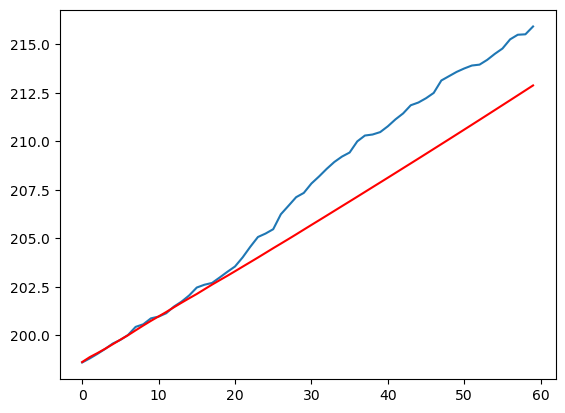

In [25]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# ML Model

In [26]:
df3 = df[(df['LogDate'] >  '2023-07-01') & (df['LogDate'] < '2024-01-01')]
df3 = df3.set_index('LogDate')
df3.sort_index(inplace = True )

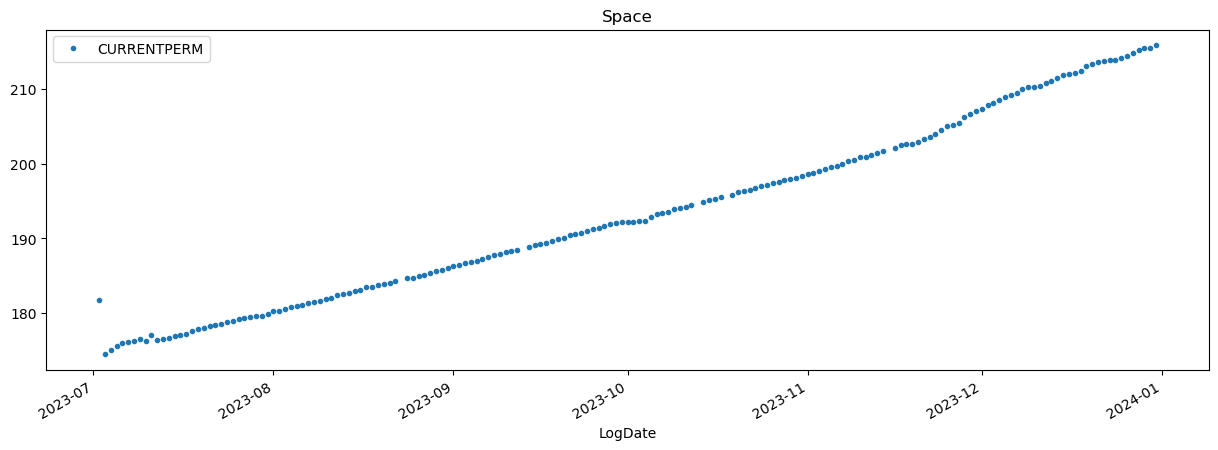

In [27]:
df3.plot(style='.',figsize=(15, 5),title='Space')
plt.show()

In [40]:
train = df3.loc[df2.index < '2023-12-01']
test = df3.loc[(df2.index >= '2023-12-01') & (df2.index < '2024-01-01')]

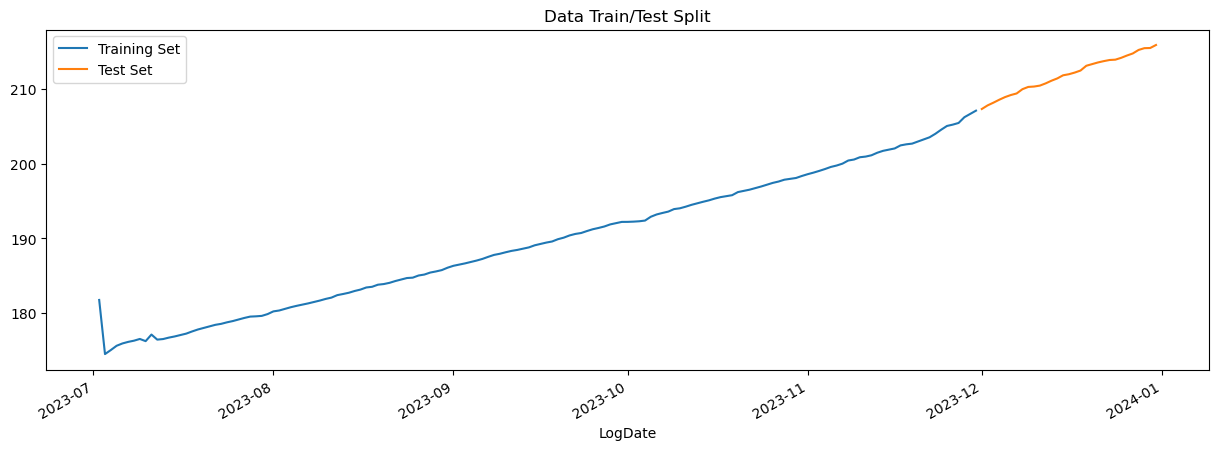

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [30]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [31]:
df3 = create_features(df3)

In [32]:
df3.head()

,CURRENTPERM,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
LogDate,,,,,,,,
2023-07-02,181.766317,6,3,7,2023,183,2,26
2023-07-03,174.514185,0,3,7,2023,184,3,27
2023-07-04,175.051491,1,3,7,2023,185,4,27
2023-07-05,175.626757,2,3,7,2023,186,5,27
2023-07-06,175.938131,3,3,7,2023,187,6,27


In [33]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'CURRENTPERM'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [34]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=5,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=200)

[0]	validation_0-rmse:187.22165	validation_1-rmse:209.57319
[200]	validation_0-rmse:25.94184	validation_1-rmse:41.68289
[400]	validation_0-rmse:3.74233	validation_1-rmse:13.33368
[600]	validation_0-rmse:0.61242	validation_1-rmse:7.57384
[800]	validation_0-rmse:0.14014	validation_1-rmse:6.13102
[999]	validation_0-rmse:0.04876	validation_1-rmse:5.68024


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

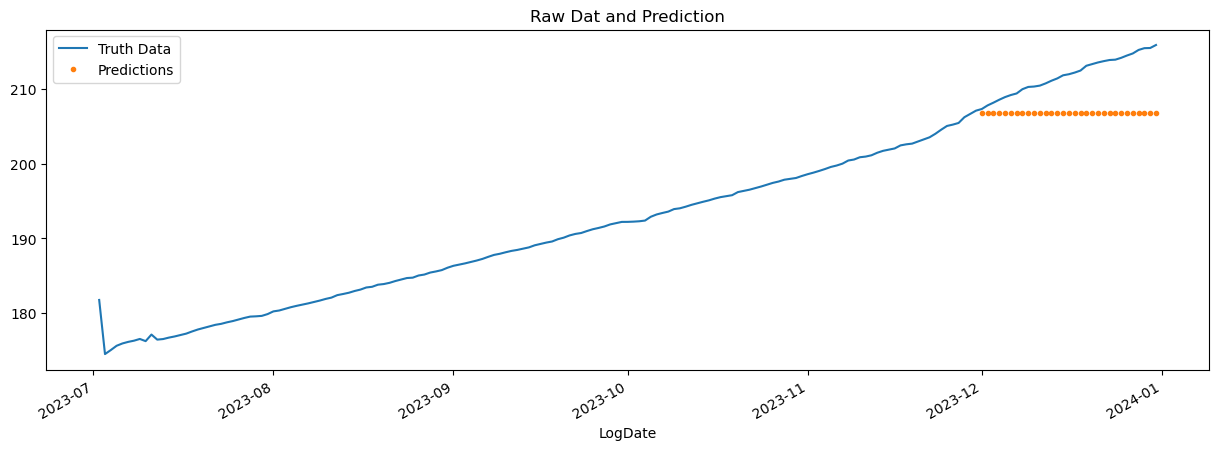

In [35]:
test['prediction'] = reg.predict(X_test)
df4 = df3.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df4[['CURRENTPERM']].plot(figsize=(15, 5))
df4['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [36]:
score = np.sqrt(mean_squared_error(test['CURRENTPERM'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 5.68


# RNN 

In [41]:
train_data = train['CURRENTPERM']
test_data = test['CURRENTPERM']
print(train_data.shape, test_data.shape)

(147,) (31,)


In [43]:
dataset_train = train_data.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(147, 1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])

[[0.22238656]
 [0.        ]
 [0.01647649]
 [0.03411702]
 [0.0436653 ]]


In [47]:
dataset_test = test_data.values 
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(scaled_test[:5])

[[0.        ]
 [0.05653345]
 [0.09897147]
 [0.14466313]
 [0.18600486]]


In [48]:
X_train = []
y_train = []
for i in range(20, len(scaled_train)):
    X_train.append(scaled_train[i-20:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 21:
        print(X_train)
        print(y_train)
        print()

[array([0.22238656, 0.        , 0.01647649, 0.03411702, 0.0436653 ,
       0.05014785, 0.05506388, 0.06214434, 0.05318823, 0.0801645 ,
       0.05937289, 0.061723  , 0.06766019, 0.07243533, 0.07841942,
       0.08411575, 0.09297027, 0.10101453, 0.10738087, 0.11370267])]
[0.12016935305850485]

[array([0.22238656, 0.        , 0.01647649, 0.03411702, 0.0436653 ,
       0.05014785, 0.05506388, 0.06214434, 0.05318823, 0.0801645 ,
       0.05937289, 0.061723  , 0.06766019, 0.07243533, 0.07841942,
       0.08411575, 0.09297027, 0.10101453, 0.10738087, 0.11370267]), array([0.        , 0.01647649, 0.03411702, 0.0436653 , 0.05014785,
       0.05506388, 0.06214434, 0.05318823, 0.0801645 , 0.05937289,
       0.061723  , 0.06766019, 0.07243533, 0.07841942, 0.08411575,
       0.09297027, 0.10101453, 0.10738087, 0.11370267, 0.12016935])]
[0.12016935305850485, 0.12417203433087654]



In [49]:
X_test = []
y_test = []
for i in range(20, len(scaled_test)):
    X_test.append(scaled_test[i-20:i, 0])
    y_test.append(scaled_test[i, 0])

In [50]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (127, 20, 1) y_train : (127, 1)


In [51]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (11, 20, 1) y_test : (11, 1)


## SimpleRNN Model

In [53]:
# initializing the RNN
regressor = Sequential()
 
# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 20, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = 20, 
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 20,
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add( SimpleRNN(units = 20))
 
# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))
 
# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0389
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1453e-04
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.6469e-04
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5965e-04
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9434e-04
Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4071e-04

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 20, 20)              │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 20, 20)              │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 20, 20)              │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,844 (22.83 KB)

 Trainable params: 2,921 (11.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,923 (11.42 KB)

## LSTM RNN Model

In [54]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
                       return_sequences = False))
regressorLSTM.add(Dense(25))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])

regressorLSTM.summary()
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0027 - loss: 0.0126
Epoch 2/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0096 - loss: 2.1903e-04
Epoch 3/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0013 - loss: 3.9522e-04  
Epoch 4/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0015 - loss: 2.3600e-04    
Epoch 5/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0085 - loss: 0.0021
Epoch 6/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0022 - loss: 2.8217e-04
Epoch 7/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0262 - loss: 1.9451e-04
Epoch 8/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0013 - loss: 1.9506e-04    
Epoch 9/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0136 - loss: 6.9325e-04
Epoch 10/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0088 - loss: 1.6710e-04
Epoch 11/12
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0143 - loss: 1.1179e-04
Epoch 

## GRU RNN Model

In [55]:
#Initialising the model
regressorGRU = Sequential()
 
# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     activation='tanh'))
 
# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
                                   decay=1e-7, 
                                   momentum=0.9, 
                                   nesterov=False),
                     loss='mean_squared_error')
 
regressorGRU.summary()
# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 20, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 20, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 20, 50)              │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0538
Epoch 2/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.1704e-04
Epoch 3/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.2614e-04
Epoch 4/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3022e-04
Epoch 5/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.5725e-04
Epoch 6/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.1513e-04
Epoch 7/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.2841e-04
Epoch 8/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.8557e-04
Epoch 9/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.3391e-04
Epoch 10/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.9720e-04
Epoch 11/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.6090e-04
Epoch 12/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.1548e-04
Epoch 13/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3330e-04
Epoch 14/20
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.

In [56]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


In [81]:
score = np.sqrt(mean_squared_error(y_RNN, y_test))
print(f'RMSE Score on Test set For Basic RNN : {score:0.2f}')


score = np.sqrt(mean_squared_error(y_LSTM, y_test))
print(f'RMSE Score on Test set For LSTM : {score:0.2f}')


score = np.sqrt(mean_squared_error(y_GRU, y_test))
print(f'RMSE Score on Test set For GRU : {score:0.2f}')

RMSE Score on Test set For Basic RNN : 0.14
RMSE Score on Test set For LSTM : 0.18
RMSE Score on Test set For GRU : 0.14


In [57]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

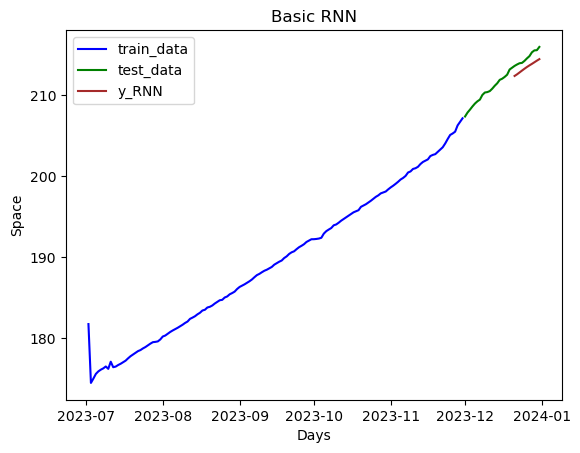

In [77]:
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
plt.plot(train_data.index, train_data, label = "train_data", color = "b")
plt.plot(test_data.index, test_data, label = "test_data", color = "g")
plt.plot(test_data.index[20:], y_RNN_O, label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic RNN")
plt.xlabel("Days")
plt.ylabel("Space")
plt.show()

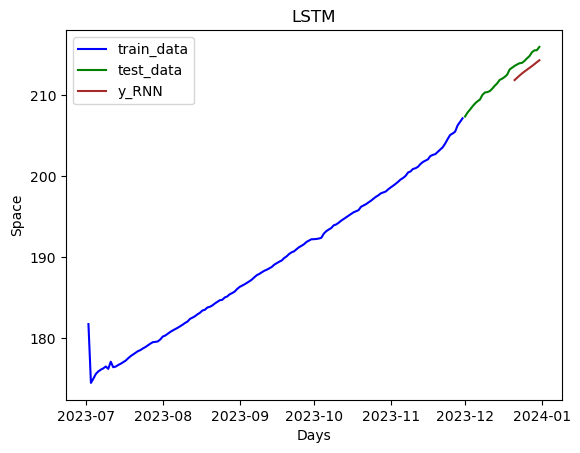

In [83]:
fig.suptitle('Model Predictions')
 
#Plot for LSTM predictions
plt.plot(train_data.index, train_data, label = "train_data", color = "b")
plt.plot(test_data.index, test_data, label = "test_data", color = "g")
plt.plot(test_data.index[20:], y_LSTM_O, label = "y_RNN", color = "brown")
plt.legend()
plt.title("LSTM")
plt.xlabel("Days")
plt.ylabel("Space")
plt.show()

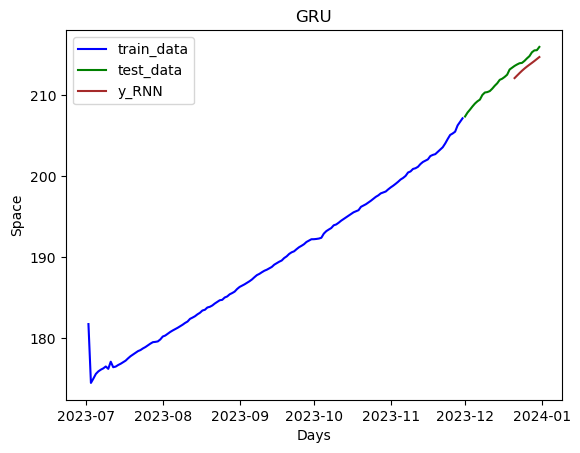

In [79]:
fig.suptitle('Model Predictions')
 
#Plot for GRU predictions
plt.plot(train_data.index, train_data, label = "train_data", color = "b")
plt.plot(test_data.index, test_data, label = "test_data", color = "g")
plt.plot(test_data.index[20:], y_GRU_O , label = "y_RNN", color = "brown")
plt.legend()
plt.title("GRU")
plt.xlabel("Days")
plt.ylabel("Space")
plt.show()